In [32]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [33]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [34]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [35]:
%matplotlib inline

In [36]:
%store -r X_relative_footsteps
%store -r Y_relative_footsteps
print(X_relative_footsteps.shape)
print(Y_relative_footsteps.shape)

(21416, 28)
(21416, 12)


# Multivariate Linear Regression (Foot prediction)

In [37]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps[:, 24] == 1)[0]
X_relative_footsteps_RR_swing = X_relative_footsteps[idxs]
Y_relative_footsteps_RR_swing = Y_relative_footsteps[idxs]

## Predict FL foot -> x

In [39]:
X_relative_footsteps_RR_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.01715523,  0.02680482,
        0.05156133, -0.00914702,  0.0315145 , -0.02258525,  0.237     ,
        0.17      , -0.409     ,  0.233     , -0.168     , -0.409     ,
       -0.243     ,  0.165     , -0.412     , -0.241     , -0.164     ,
       -0.412     ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.1       ,  0.        ,  0.        ])

In [40]:
Y_relative_footsteps_RR_swing[0, :]

array([ 0.226,  0.174, -0.409,  0.24 , -0.166, -0.41 , -0.238,  0.166,
       -0.413, -0.252, -0.159, -0.413])

### Linear Regression

In [42]:
# Input
X = np.hstack((X_relative_footsteps_RR_swing[:, :3], # prev velocity command
               X_relative_footsteps_RR_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_RR_swing[:, 6]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9964156451406017
RMSE:  0.0010183189622785846
The lowest error is:  3.2507283742599924e-07
The highest error is:  0.007576164678635977
The avg. error is:  0.000691761051187508


In [43]:
model_rr_relative_swinging_x.coef_

array([[ 0.13965662,  0.00639142,  0.01805187, -0.03651511, -0.00226514,
        -0.00642182,  0.04535437, -0.02437856, -0.02583746,  0.0088256 ,
         0.49331086,  0.01254572,  0.12948794, -0.07718626]])

In [46]:
model_rr_relative_swinging_x.intercept_

array([-0.10922682])

Text(0, 0.5, 'Predictions')

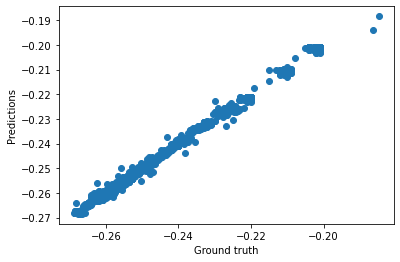

In [45]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rr_relative_swinging_x

In [23]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [49]:
# Input
X = np.hstack((X_relative_footsteps_RR_swing[:, :3], # prev velocity command
               X_relative_footsteps_RR_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_RR_swing[:, 7]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9992773982257059
RMSE:  0.0008666447960609884
The lowest error is:  1.1669046656725968e-07
The highest error is:  0.009304829337465709
The avg. error is:  0.0005662037297587277


In [50]:
model_rr_relative_swinging_y.coef_

array([[-0.0019292 ,  0.12826301,  0.01495222,  0.01253768, -0.00615282,
         0.09494268, -0.02894828,  0.00971136, -0.01310489, -0.02393984,
        -0.02896051,  0.47161335, -0.09023618, -0.08713394]])

In [51]:
model_rr_relative_swinging_y.intercept_

array([0.04930409])

Text(0, 0.5, 'Predictions')

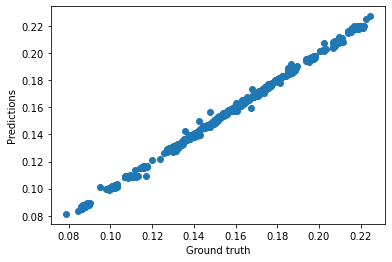

In [52]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [29]:
#%store model_rr_relative_swinging_y

In [30]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [31]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")